In [ ]:
# Modulos y datos 
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics

# Guardar en disco duro las reglas de decision de nuestros arboles
# from sklearn.tree import export_text

# dataset 
train= pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/titanic_train.csv")

In [ ]:
# Analicemos la clase DecisionTreeClassifier
help(DecisionTreeClassifier)

In [ ]:
# Preprocesamiento de los datos 
# 
# Nombres de las columnas
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# Valores faltantes (ver como porcentajes) 
train.isnull().sum().sort_values(ascending = False)/train.shape[0]*100

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [ ]:
# Separemos solo las columnas con valores faltantes 
Faltantes = pd.concat([train.isnull().sum()],
                      axis = 1, 
                      keys = ["EntrenamientoTitanic"])
Faltantes[Faltantes.sum(axis = 1) >0]

,EntrenamientoTitanic
Age,177
Cabin,687
Embarked,2


In [ ]:
# eliminemos algunas columnas que no aportan informacion 
# al modelo 
train.pop("PassengerId")
train.pop("Cabin")
train.pop("Name")
train.pop("Ticket")

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [ ]:
# Observemos que columnas aun mantienen valores faltantes : Age y Embarked
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# Imputemos/rellenemos los valores faltantes de las columnas Age y Embarked


In [ ]:
# En vista de que Age es una variable cuantitativa imputemosla 
# usando la media de los valores 
train.Age = train.Age.fillna(train.Age.mean())

In [ ]:
# Tambien observamos que la columna embarked es una variable
# cualitativa, entonces imputemos los valores faltantes usando
# la moda
train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])

In [ ]:
# INfo del dataframe 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
# Tecnica/Estrategia 1  : Una variable cuantitativa la transformamos en cualitativa
# Analicemos Pclass
train.Pclass.unique()
# Dada la informacion que busca proveer esta columna, transformemos la variables
# Pclass en una variable de tipo str
train.Pclass = train.Pclass.apply(str)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [ ]:
# tecnica/estrategia 2 : Agarrar todas las variables cualitativas y hacer un
# proceso de hot-encoding

# Variable Sex
train.Sex.unique()

# El hot-encoding crea un numero de columnas igual al numero de posibles 
# valores de mi variable cualitativa : SexMale y SexFemale 
# 
# Supongamos que tenemos un valor : male 
# SexMale = 1 
# SexFemale = 0



array(['male', 'female'], dtype=object)

In [ ]:
# Variable Embarked
train.Embarked.unique()

# Esta columna Embarked tiene 3 posibles valores , el proceso de hot-encoding
# va crear 3 columnas : EmbarkedS , EmbarkedC, EmbarkedQ
# 
# COnsidemo una observacion : Embarked = "S"
# EmbarkedS = 1
# EmbarkedC = 0
# EmbarkedQ = 0

# COnsidemo una observacion : Embarked = "Q"
# EmbarkedS = 0
# EmbarkedC = 0
# EmbarkedQ = 1

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
# Implementemos un hot-encoding sobre toda las columnas de tipo
# object (str). Para ello usemos una estructura repetitiva 

for col in train.dtypes[train.dtypes == "object"].index:
  print(col)
  # Borremos las columnas de tipo object
  Col4Dummy = train.pop(col)
  # Agregaremos las variables dummies a mi dataframe 
  train = pd.concat([train, pd.get_dummies(Col4Dummy, prefix = col)], axis = 1)

Pclass
Sex
Embarked


In [ ]:
# Visualicemos nuestro dataframe 
train

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,1
888,0,29.699118,1,2,23.4500,0,0,1,1,0,0,0,1
889,1,26.000000,0,0,30.0000,1,0,0,0,1,1,0,0


In [ ]:
# Guardemos el dataset que ya se encuentra limpio y correctamente codificado 
# en disco duro 
train.to_csv("Titanic4Model.csv")

In [ ]:
# Empecemos con el proceso de creacion de un modelo de tipo
# arbol de decision

# Creacion de las variables independientes y de la variable dependiente
labels = train.pop("Survived")
features = train

In [ ]:
# particionado de los datos 
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(features,
                                                                        labels,
                                                                        test_size = 0.25)

In [ ]:
# 3 pasos fundamentales : Creacion del modelo 

# INstanciamos la clase que define al modelo 
ModelDt1 = DecisionTreeClassifier()

# Ajustamos el modelo al conjunto de datos de entrenamiento 
ModelDt1.fit(X_entrenamiento, y_entrenamiento)

# Calculamoslos scores para los datos de prueba 
ModelDt1.score(X_prueba, y_prueba)

0.7757847533632287

In [ ]:
# Evaluemos el modelo 
# Construccion pronosticos usando el modelo 
yModelo = ModelDt1.predict(X_prueba)

# matriz de confusion 
metrics.confusion_matrix(y_prueba, yModelo)

array([[113,  25],
       [ 25,  60]])

In [ ]:
# Calculemos el Area bajo la curva (Area under the curve : AUC)
FP, TP, Thrs = metrics.roc_curve(y_prueba, yModelo)

# Calculo del AUC 
metrics.auc(FP, TP)

0.7623614663256607

In [ ]:
# Busquemos mejor nuestro primer arbol : ModelDt1
# Consideremos al argumento max_depth

# Lista de metodos que posee el objeto ModelDt1
dir(ModelDt1)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'max_features_',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_sam

In [ ]:
# Veamos que informacion obtenemos del metodo get_params 
help(ModelDt1.get_params)

Help on method get_params in module sklearn.base:

get_params(deep=True) method of sklearn.tree._classes.DecisionTreeClassifier instance
    Get parameters for this estimator.
    
    Parameters
    ----------
    deep : bool, default=True
        If True, will return the parameters for this estimator and
        contained subobjects that are estimators.
    
    Returns
    -------
    params : dict
        Parameter names mapped to their values.



In [ ]:
ModelDt1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Veamos la informacion que produce el metodo get_depth
help(ModelDt1.get_depth)

Help on method get_depth in module sklearn.tree._classes:

get_depth() method of sklearn.tree._classes.DecisionTreeClassifier instance
    Return the depth of the decision tree.
    
    The depth of a tree is the maximum distance between the root
    and any leaf.
    
    Returns
    -------
    self.tree_.max_depth : int
        The maximum depth of the tree.



In [ ]:
ModelDt1.get_depth()

19

In [ ]:
# Construyamos un archivo de texto con el conjunto de reglas de decision
# de nuestro primer modelo de tipo arbol de decision
from sklearn.tree import export_text
print(export_text(ModelDt1))


|--- feature_8 <= 0.50
|   |--- feature_6 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  2.50
|   |   |   |--- feature_3 <= 28.86
|   |   |   |   |--- feature_3 <= 28.23
|   |   |   |   |   |--- feature_0 <= 55.50
|   |   |   |   |   |   |--- feature_0 <= 27.50
|   |   |   |   |   |   |   |--- feature_0 <= 25.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 13.40
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 22.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  22.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  13.40
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_0 >  25.50
|   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |---

In [ ]:
# Guardemos nuestro arbol de decision en un archivo de texto 
ModelDt1_test = export_text(ModelDt1)
with open("ModelDt1.Tree", "w") as EstimadorText:
  EstimadorText.write(ModelDt1_test)


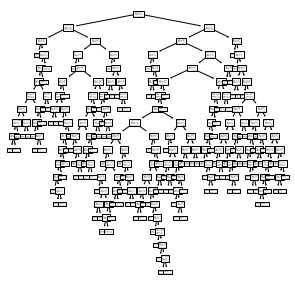

In [ ]:
# Creacion de un grafico para nuestro arbol de decision 
from sklearn.tree import plot_tree

plt.ioff()
plt.figure(figsize = (5,5))
plot_tree(ModelDt1)
plt.savefig("ModelDt1_PrimerModelo.png", dpi = 300)
plt.ion()

In [ ]:
# Listas para guardar los auc
train_results = []
test_results = []

# Definamos un dataframe 
d = pd.DataFrame()

# Espacio de busqueda para el hiperparametro mas_depth
EspMaxProf = np.linspace(2,60, 59)

# Estructura repetitiva para barrer todos los valores de EspMaxProf
for MaxProfundidad in EspMaxProf:
  # Construimos un modelo 
  dt = DecisionTreeClassifier(max_depth = MaxProfundidad)
  # Ajustamos este modelo con los datos de entrenamiento
  dt.fit(X_entrenamiento, y_entrenamiento)
  # Calculo prediccion 
  ForecastTrain = dt.predict(X_entrenamiento)
  # Calculamos el AUC para los datos de entrenamiento 
  Fp, Tp, Thrsd = metrics.roc_curve(y_entrenamiento, ForecastTrain)
  AUC_train = metrics.auc(Fp, Tp)
  train_results.append(AUC_train)
  # 
  # Ahora lo mismo para los datos de prueba 
  ForecastTest = dt.predict(X_prueba)
  Fp, Tp, thrsd = metrics.roc_curve(y_prueba, ForecastTest)
  AUC_Test = metrics.auc(Fp, Tp)
  test_results.append(AUC_Test)

# Almacenamos toda esta informacion en un dataframe 
d = pd.DataFrame({"Profundidad" : EspMaxProf,
                  "AUC Train": train_results,
                  "AUC Test" : test_results})

print(d.sort_values(by = "AUC Test", ascending = False))

    Profundidad  AUC Train  AUC Test
39         41.0   0.986381  0.799020
2           4.0   0.820747  0.789088
41         43.0   0.986381  0.787255
48         50.0   0.986381  0.785891
8          10.0   0.928011  0.784996
16         18.0   0.984436  0.782268
13         15.0   0.978599  0.781373
10         12.0   0.952820  0.781373
14         16.0   0.984436  0.780009
43         45.0   0.986381  0.780009
25         27.0   0.986381  0.780009
46         48.0   0.986381  0.780009
11         13.0   0.966926  0.779113
57         59.0   0.986381  0.778645
24         26.0   0.986381  0.778645
54         56.0   0.986381  0.777749
6           8.0   0.896149  0.776854
30         32.0   0.986381  0.776385
15         17.0   0.984436  0.776385
52         54.0   0.986381  0.776385
21         23.0   0.986381  0.776385
7           9.0   0.914151  0.775490
40         42.0   0.986381  0.774126
22         24.0   0.986381  0.774126
33         35.0   0.986381  0.774126
31         33.0   0.986381  0.774126
1

In [ ]:
# EMpecemos estudiando a los bosques aleatorios 
# Modelado 
from sklearn.ensemble import RandomForestClassifier
# Carguemos la clase GridSearchCV para realizar una busqueda
# de Hiperparametros 
from sklearn.model_selection import GridSearchCV



In [ ]:
# Definamos variables independientes y dependiente nuevas
y = labels
X = features

# Particionemos nuestro dataset 
X_train, X_test, yTrain, yTest = train_test_split(X,y,
                                                  train_size = 0.9)

# Instanciamos el modelo 
Bosque1Titanic = RandomForestClassifier()

# Ajustamos el modelo 
Bosque1Titanic.fit(X_train, yTrain)

# Calculomos los scores para los datos de testeo 
score = Bosque1Titanic.score(X_test, yTest)
print("Score : %f" %(score))

# Pronostiquemos con los datos de testeo 
yForecast_Bosque1 = Bosque1Titanic.predict(X_test)

# Calculo del AUC
Fp, Tp, Thres = metrics.roc_curve(yTest, yForecast_Bosque1)
AUC_Bosque1 = metrics.auc(Fp, Tp)
print("AUC : %f " %(AUC_Bosque1))

Score : 0.800000
AUC : 0.796380 


In [ ]:
# Veamos los argumento de la clase RandomForestClasiffier
help(RandomForestClassifier)

In [ ]:
# Parametros del modelo Bosque1Titanic
Bosque1Titanic.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Realicemos una busqueda de hiperparametros 
ModBosque = RandomForestClassifier()

# Diccionario de hiperparametros 
DictHPBosque ={"n_estimators" : [50, 60, 70, 80,90, 105, 110, 130, 140, 150, 160],
               "max_depth" : np.linspace(3,7,5),
               "criterion": ["gini", "entropy"],
               "min_samples_split": np.linspace(0.1, 0.9, 5),
               "min_samples_leaf": np.linspace(0.25,0.60, 8)}

# Configuramos la busqueda de hiperparametros 
ClfBosqueGS = GridSearchCV(estimator = ModBosque,
                           param_grid = DictHPBosque,
                           cv = 5, 
                           scoring = "accuracy")

# Realicemos el trabajo duro 
import time 
Inicio = time.time()
MejorBosque = ClfBosqueGS.fit(X_train, yTrain)
Fin = time.time()
print("Tiempo de procesamiento ", Fin-Inicio)

print("Mejor Score", MejorBosque.best_score_)

print("Mejor Modelo ", MejorBosque.best_estimator_)


Tiempo de procesamiento  2889.098347425461
Mejor Score 0.621723602484472
Mejor Modelo  RandomForestClassifier(max_depth=3.0, min_samples_leaf=0.25,
                       min_samples_split=0.1, n_estimators=50)


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5500 fits failed out of a total of 22000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2750 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel